In [83]:
import numpy as np
import pandas as pd
import os 
import sklearn.datasets 
from sklearn.model_selection import train_test_split,cross_val_score
from scipy import datasets,stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import r2_score, make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Target variable (dependant variable ) a quantitative measure of disease progression one year after baseline

In [3]:
df = sklearn.datasets.load_diabetes()
df_desc = df['DESCR']
df_features = df['feature_names']    
df_data = df['data']
df_complete = pd.DataFrame(data=df_data,columns=df_features)
df_target = df["target"]
display(df_complete)
print(df_desc)
df_complete['TARGET']= df_target
df_target

age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1   -0.039493 -0.068332 -0.092204  
2   -0.002592  0.002861 -0.025930  
3    0.034309  0.022688 -0.009362  
4   -0.002592 -0.031988 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018114  0.044485  
439 -0.011080 -0.046883  0.015491  
440  0.026560  0.044529 -0.025930  
441 -0.039493 -0.004222  0.003064  

[442 rows x 10 columns]

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

### Get information about the dataset with DESCRIB.
# All features are numerical 



In [4]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  TARGET  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


# 10 features columns , all float

In [5]:
df_complete.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
TARGET    0
dtype: int64

### No null values
### duplicates?

In [6]:
df_complete.duplicated().sum()

# NO!

0

In [7]:
df_complete.corr()

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
TARGET  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6    TARGET  
age     0.203841  0.270774  0.301731  0.187889  
sex     0.332115  0.149916  0.208133  0.043062  
bmi     0.413807  0.446157  0.388680  0.586450  
bp      0.257650  0.393480  0.390430  0.441482  
s1      0.542207  0.515503  0.325717  0.212022  
s2      0.659817  0.318357  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617859  0.417212  0.430453  
s5      0.617859  1.000000  0.464669  0.565883  
s6      0.417212  0.464669  1.000000  0.382483  
TARGET  0.430453  0.565883  0.382483  1.000000

<Axes: >

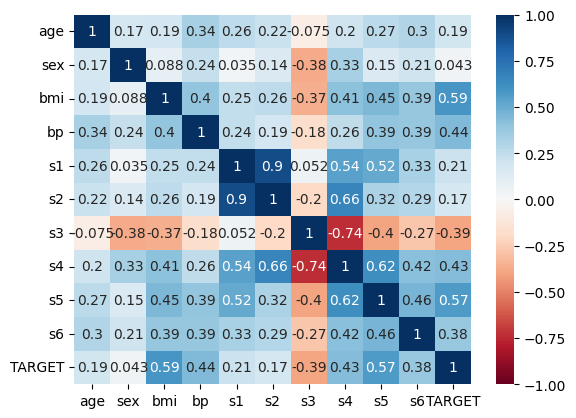

In [8]:
plt.Figure(figsize=(16,12))
sns.heatmap(df_complete.corr(),cmap='RdBu',annot=True,vmax=1,vmin=-1,cbar=True)

In [9]:
df_complete.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           TARGET  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

## Show kde plots for each numerical value

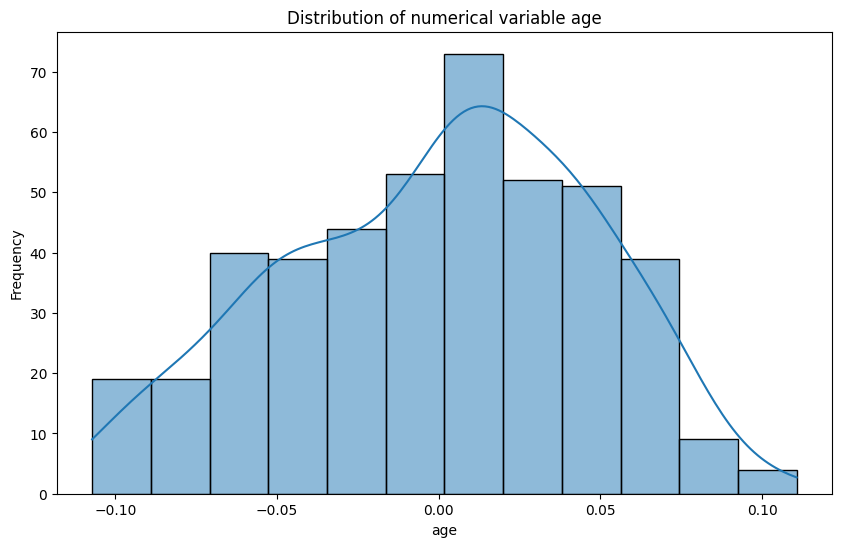

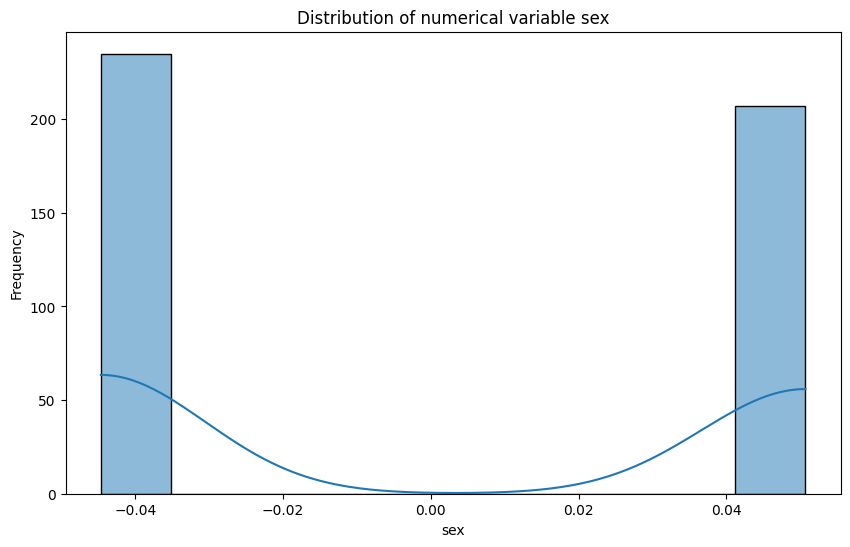

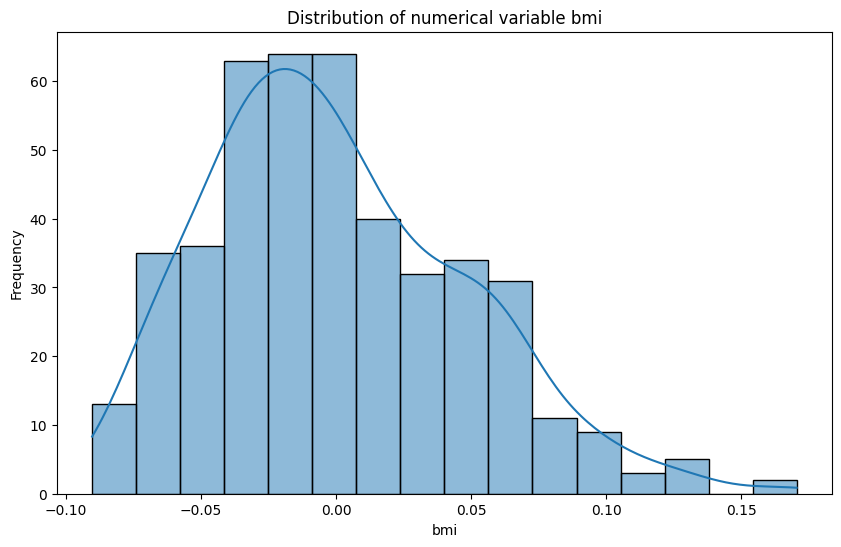

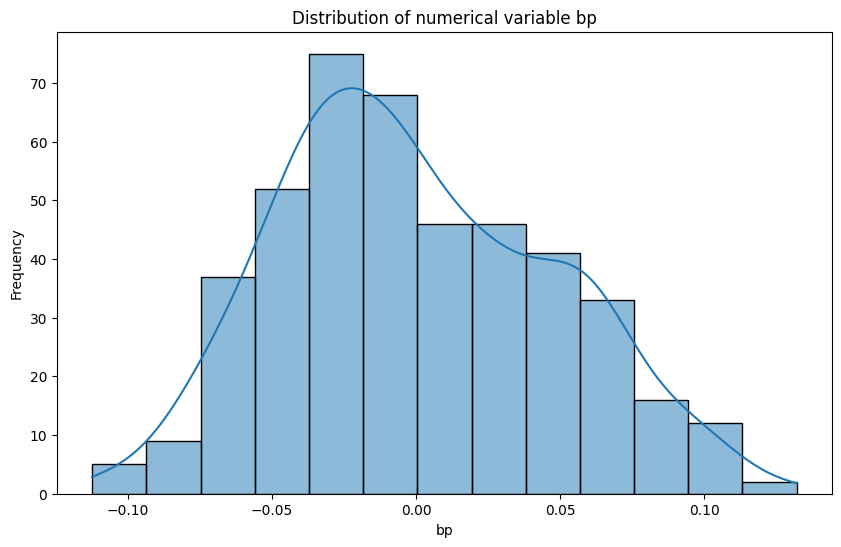

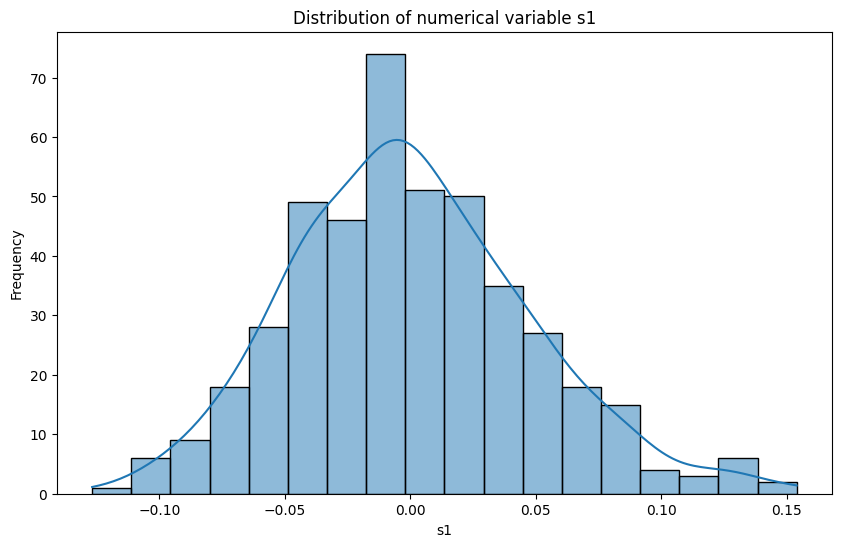

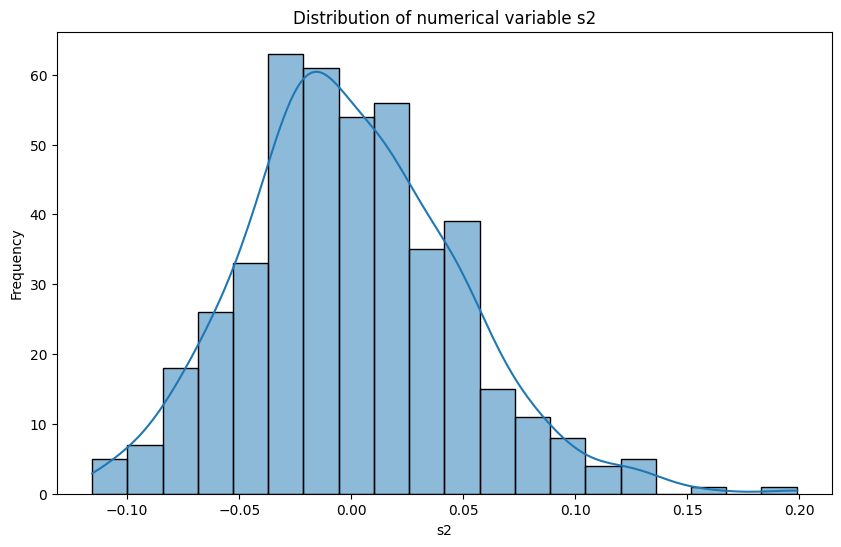

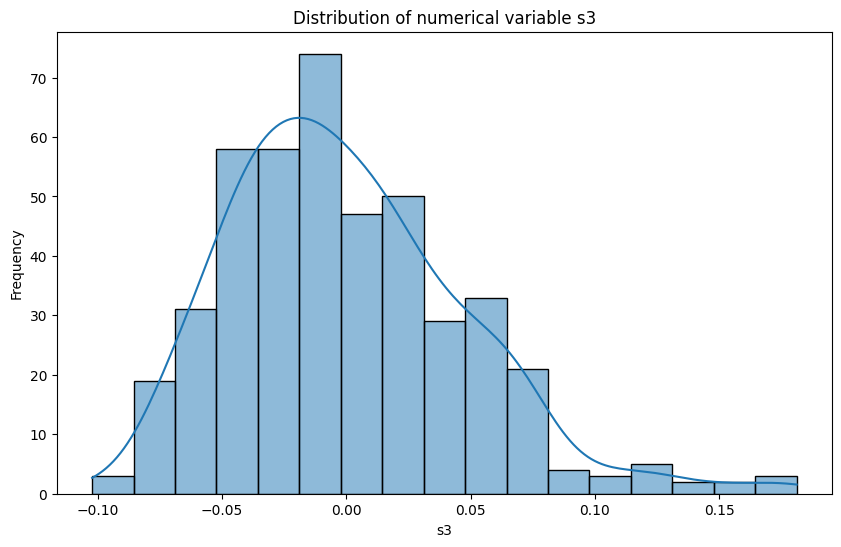

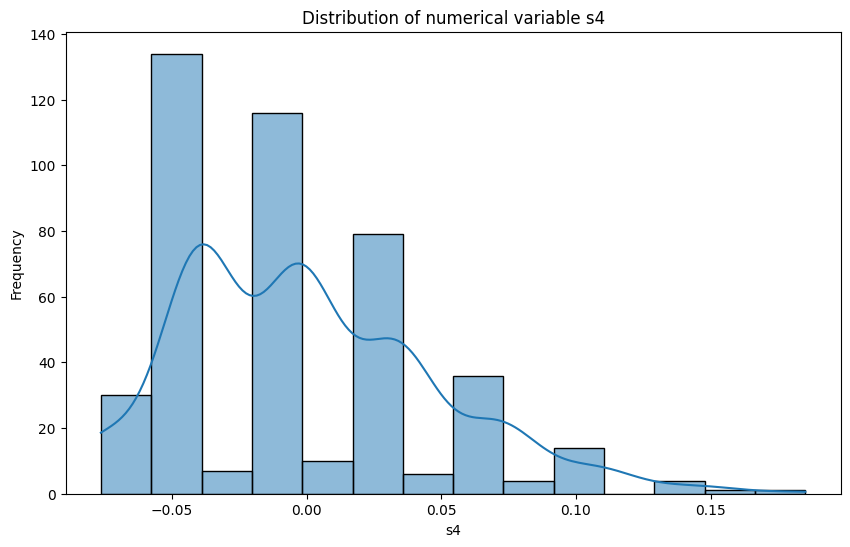

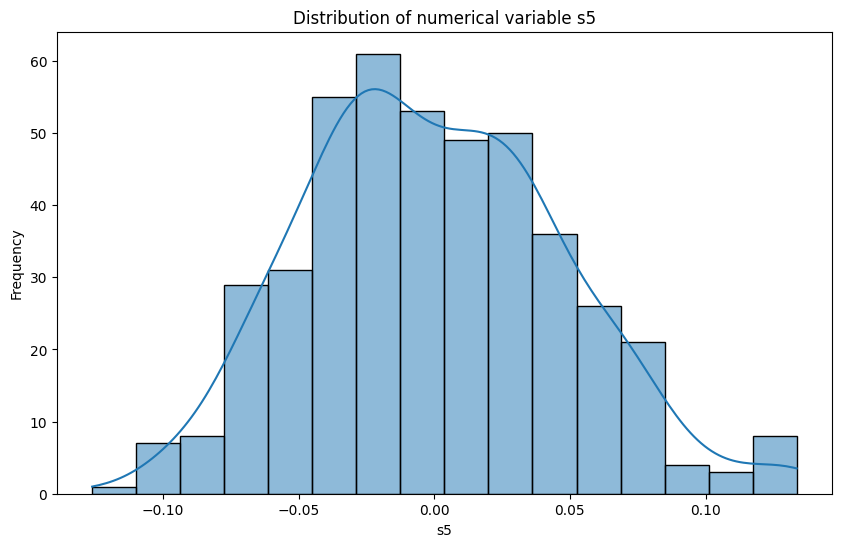

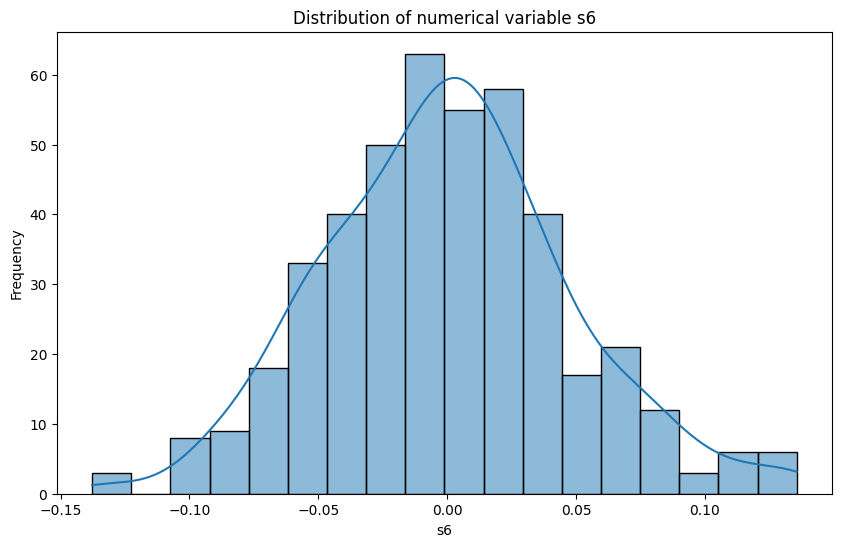

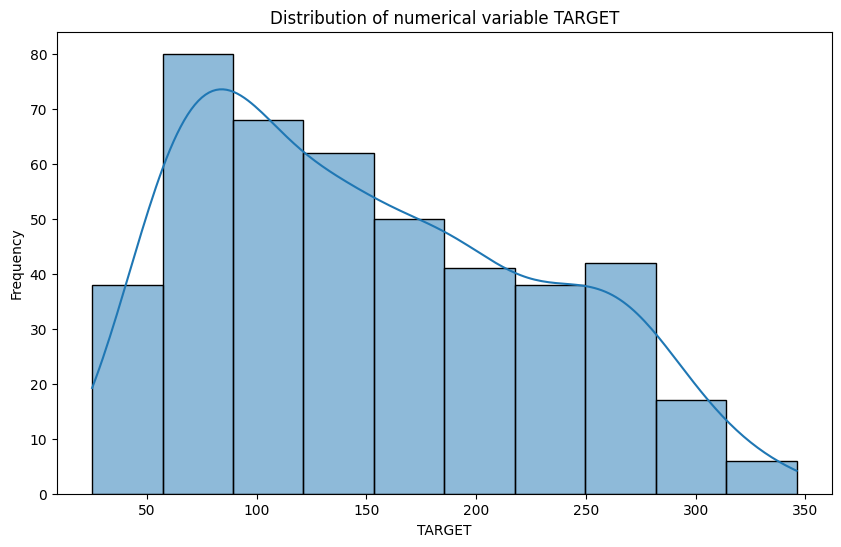

In [10]:
for col in df_complete.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df_complete[col],kde=True)
    plt.title(f'Distribution of numerical variable {col}')
    plt.ylabel('Frequency')

<bound method IndexOpsMixin.value_counts of 0      0.050680
1     -0.044642
2      0.050680
3     -0.044642
4     -0.044642
         ...   
437    0.050680
438    0.050680
439    0.050680
440   -0.044642
441   -0.044642
Name: sex, Length: 442, dtype: float64>

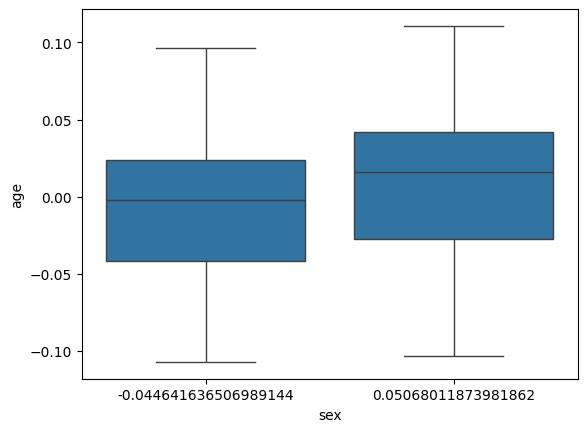

In [11]:
sns.boxplot(x=df_complete['sex'],y=df_complete['age'])
df_complete['sex'].value_counts

## Sex variable (categorical?)

### For the normalization purpose, categorical data is converted to float like data type
### it is still categorical but small float -0.04 is represented as 0 and 1 is represented as 0.05 

In [12]:
df_sex_cat = df_complete['sex'].apply(lambda x: 'male' if x > 0 else 'female')
df_sex_cat

0        male
1      female
2        male
3      female
4      female
        ...  
437      male
438      male
439      male
440    female
441    female
Name: sex, Length: 442, dtype: object

<Axes: xlabel='sex', ylabel='TARGET'>

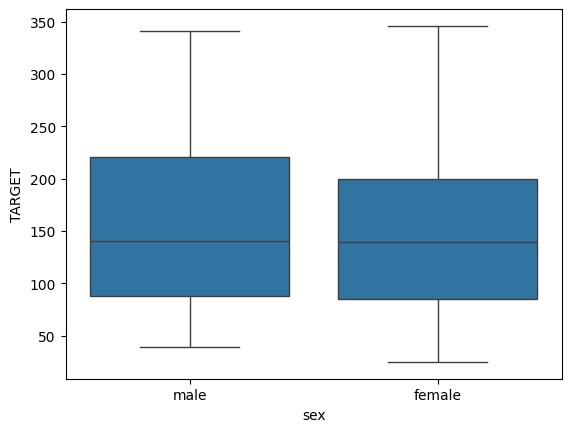

In [13]:
sns.boxplot(x=df_sex_cat,y=df_complete['TARGET'])

<Axes: xlabel='bmi', ylabel='TARGET'>

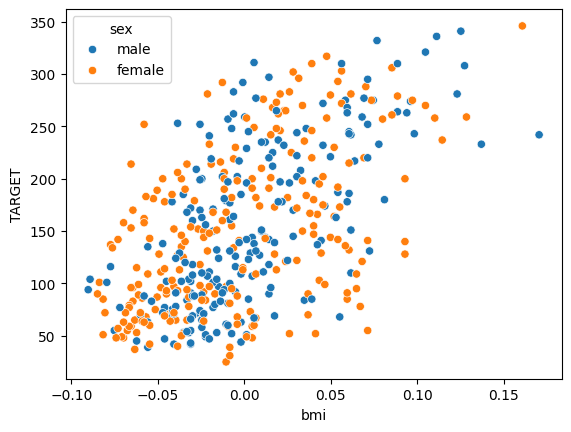

In [14]:
sns.scatterplot(x=df_complete['bmi'],y=df_complete['TARGET'],hue=df_sex_cat)

<Axes: xlabel='s5', ylabel='TARGET'>

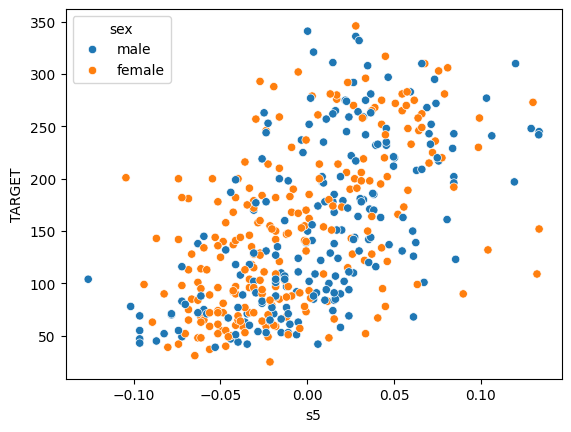

In [15]:
sns.scatterplot(x=df_complete['s5'],y=df_complete['TARGET'],hue=df_sex_cat)

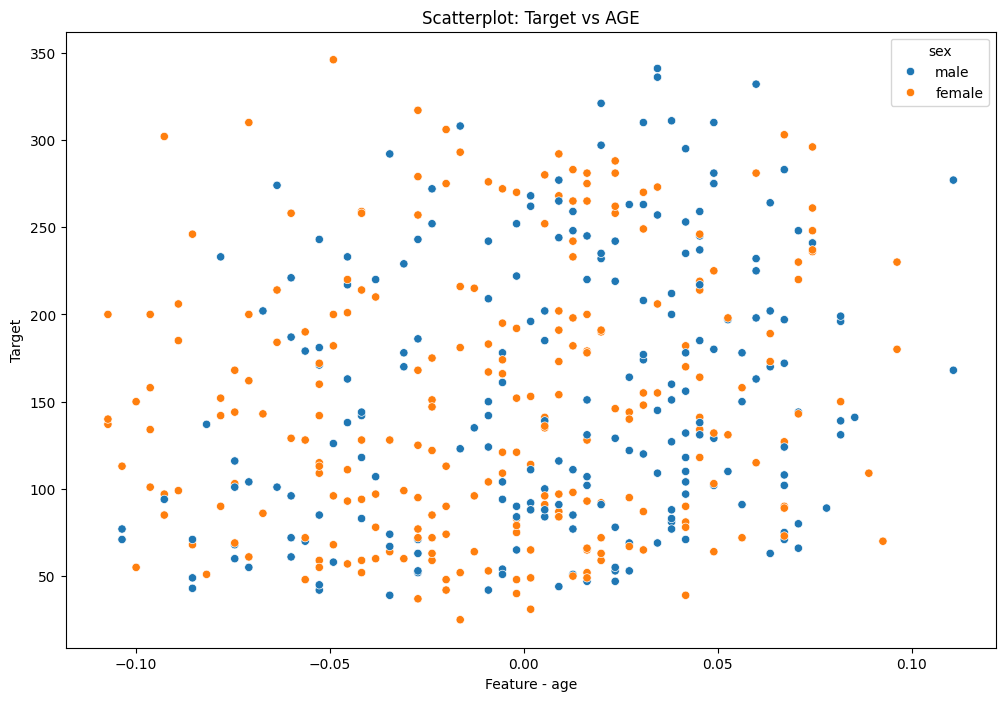

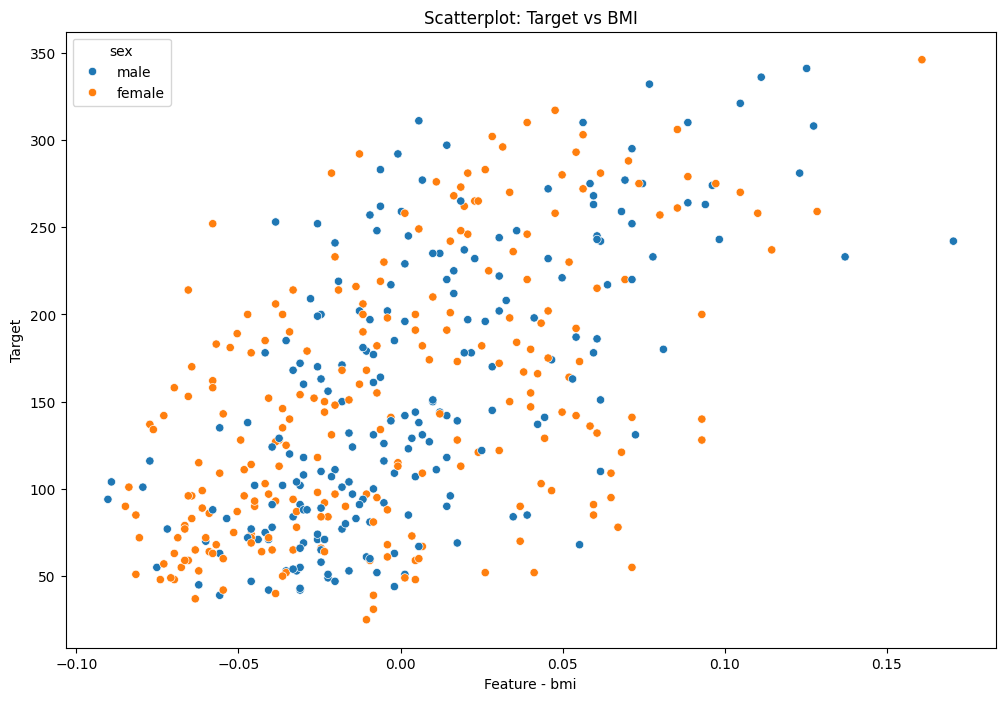

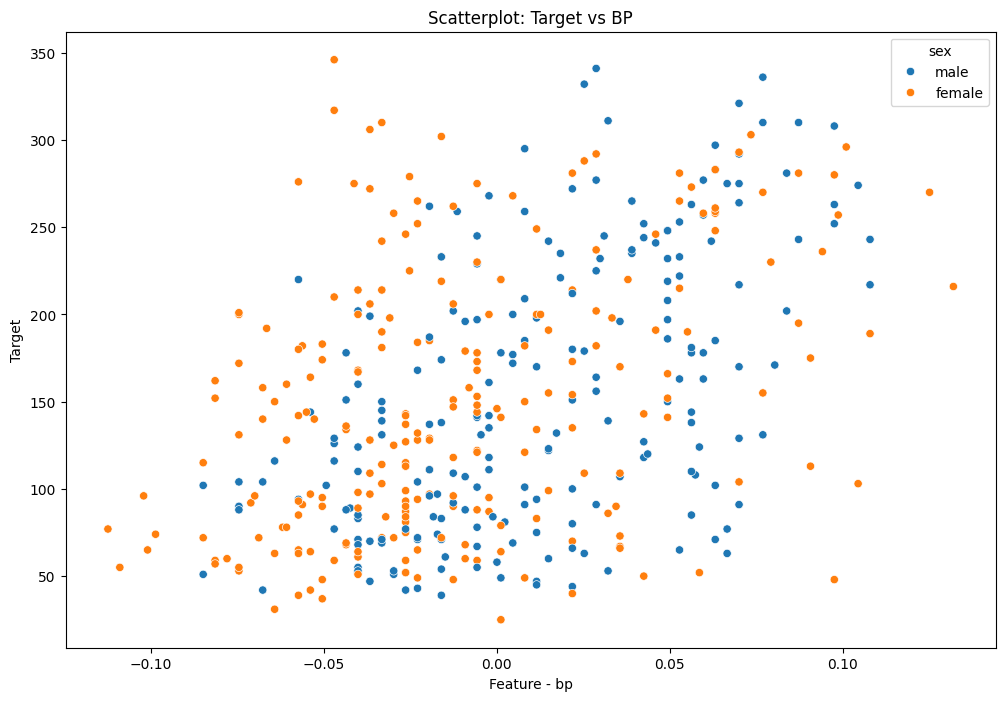

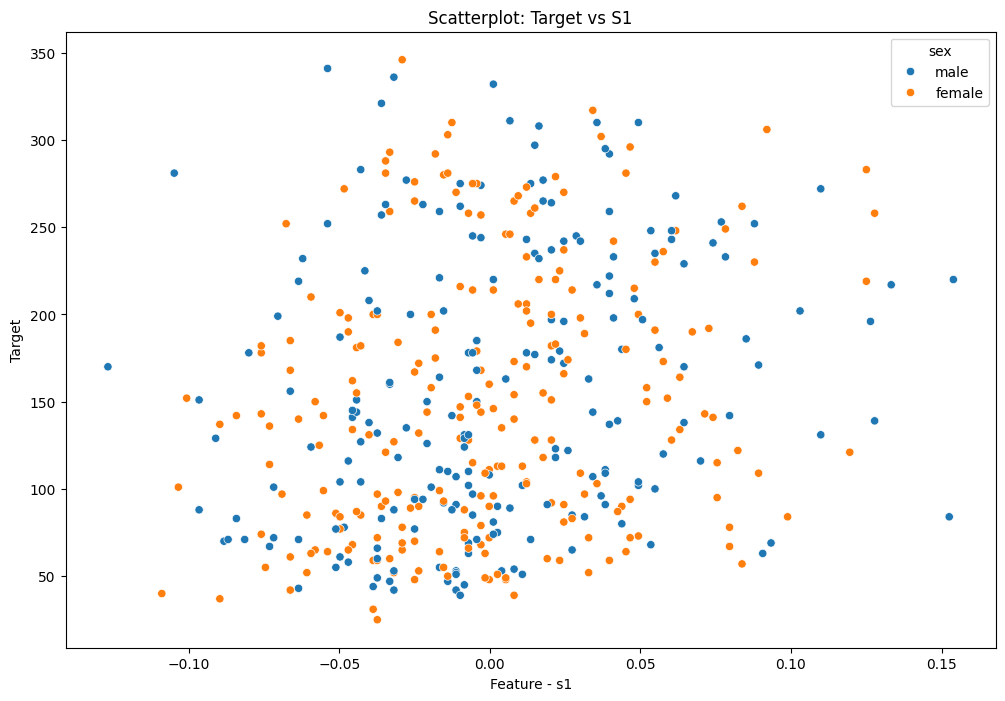

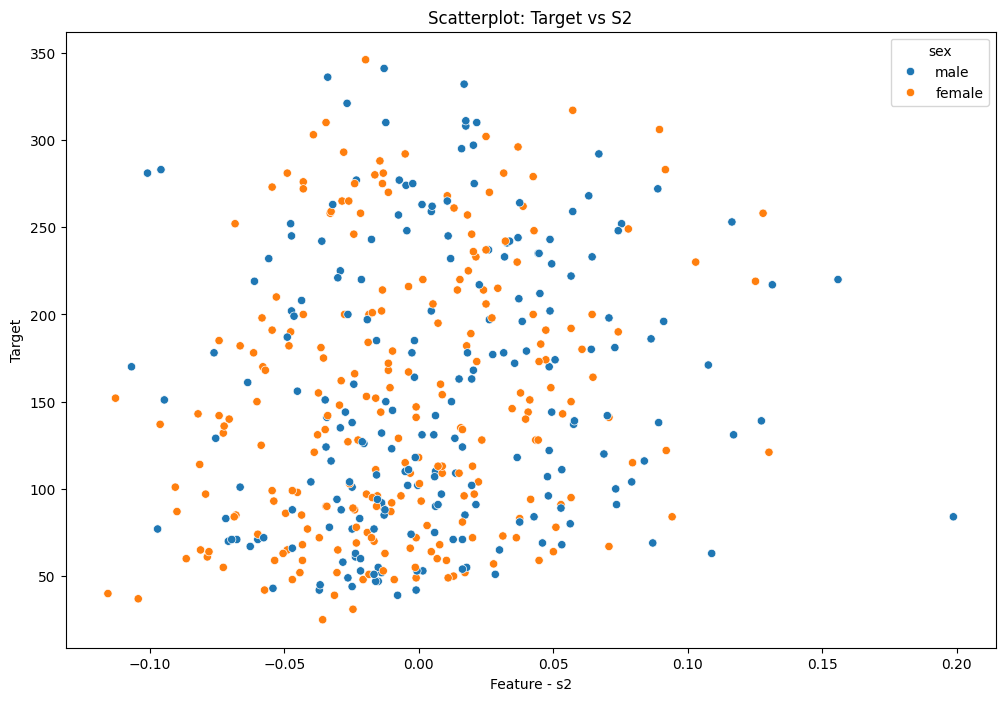

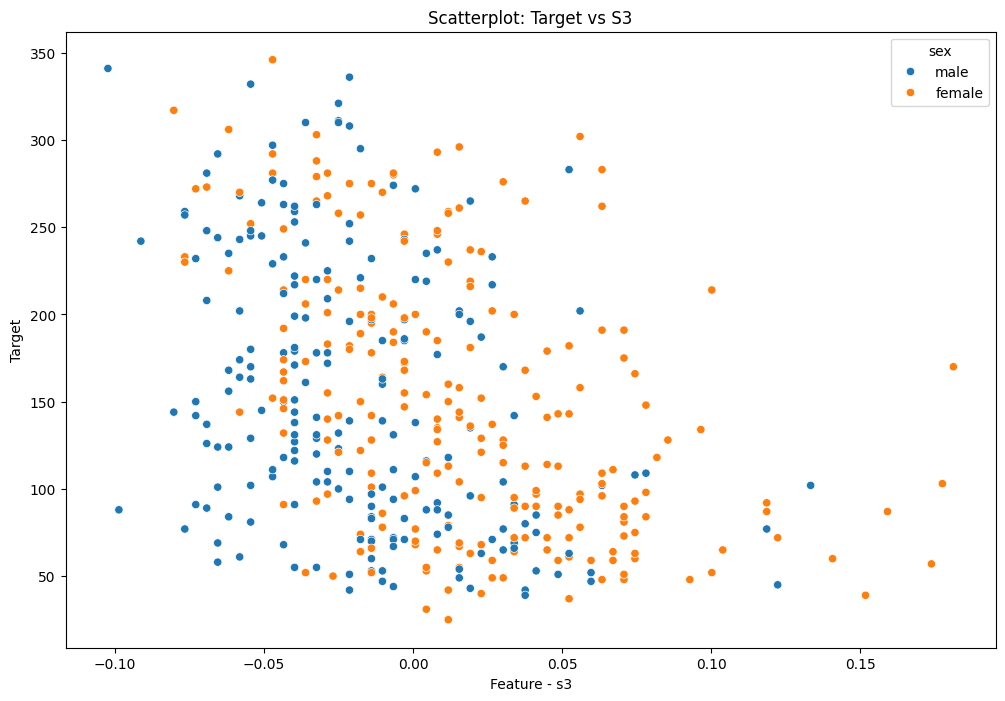

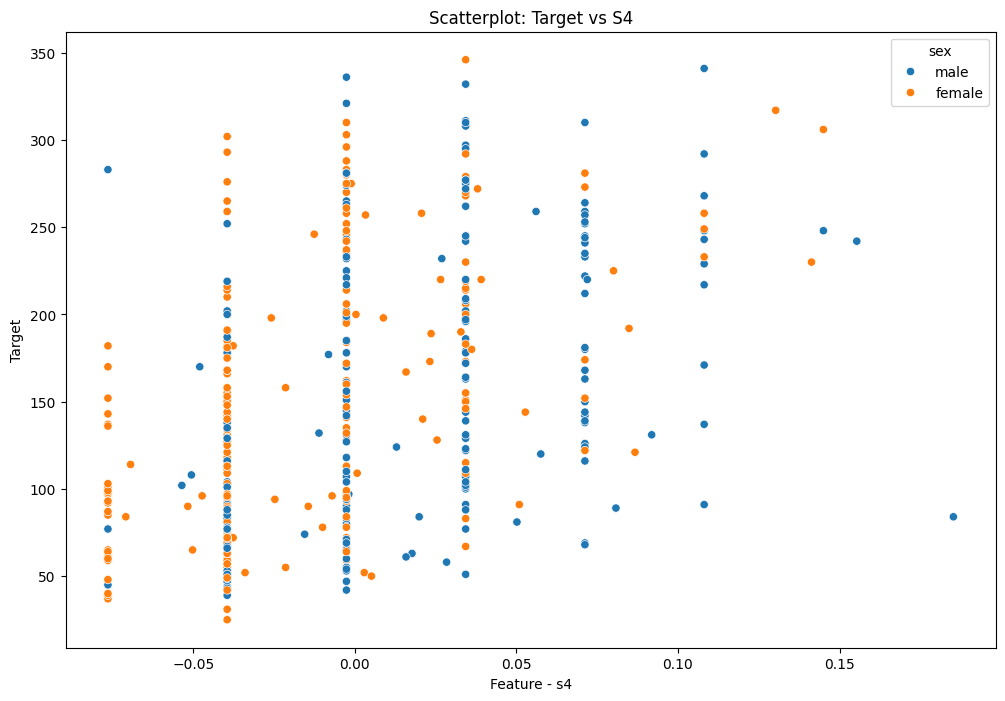

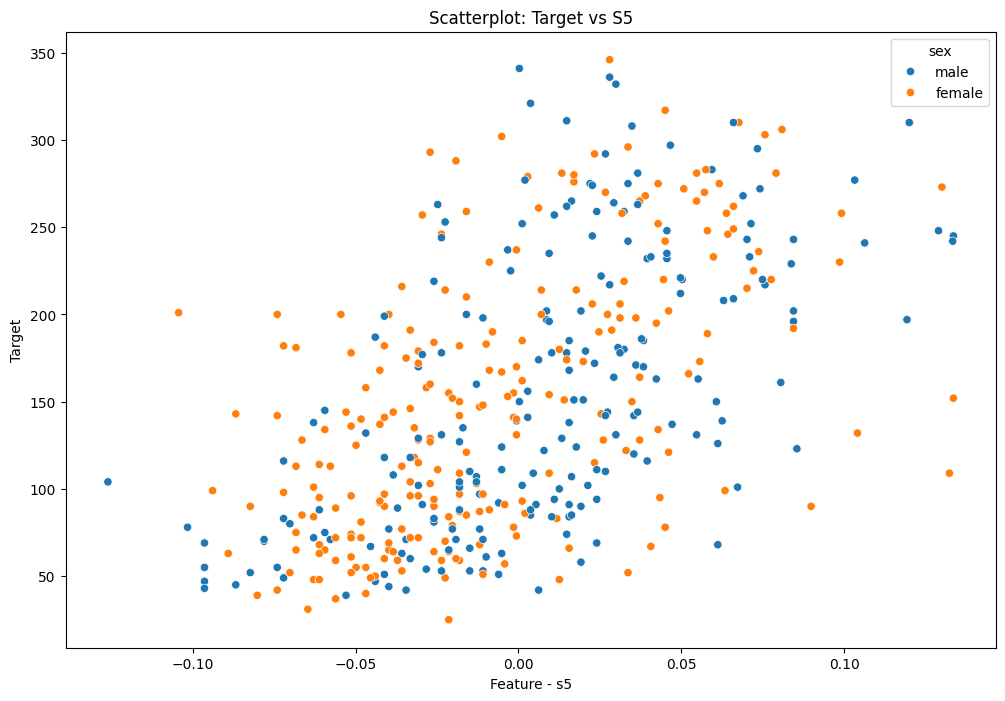

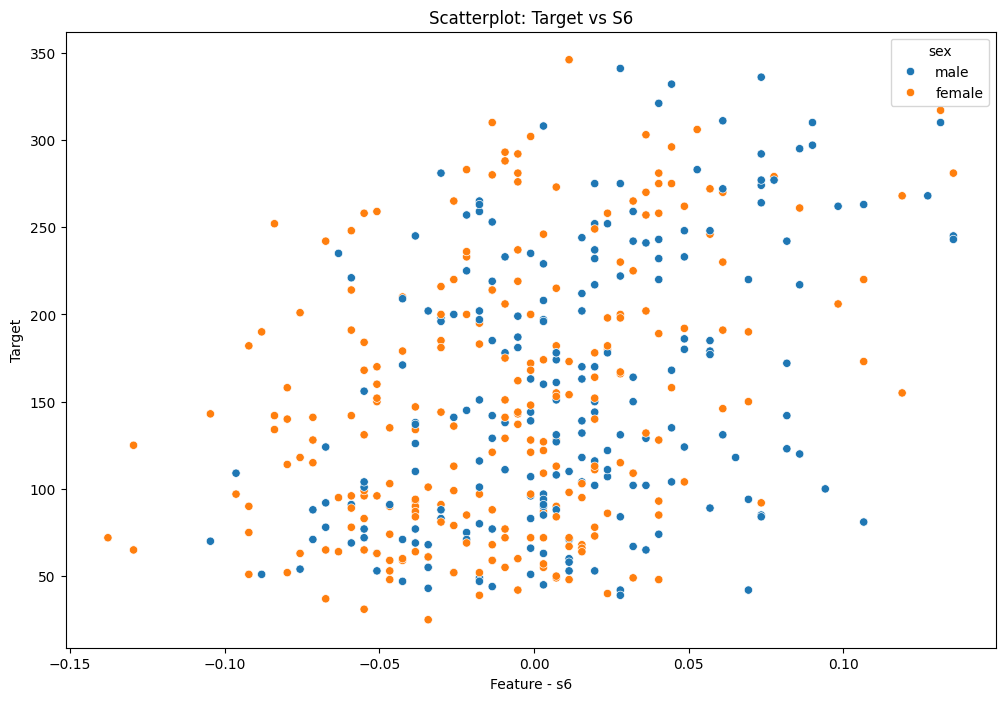

In [16]:
df_complete.corr()['TARGET'].sort_values()
for col in df_complete.columns[:-1]: # Slice to -1 because -1 is TARGET and no need for target vs target. Its 45 degrees slope
    if col =='sex': #also no need to compare with categorical feature so i skip it
        continue
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=df_complete[col],y=df_target,hue=df_sex_cat)
    plt.ylabel('Target')
    plt.xlabel(f'Feature - {col}')
    plt.title(f'Scatterplot: Target vs {col.upper()}')
    plt.show()

<Figure size 1600x1200 with 0 Axes>

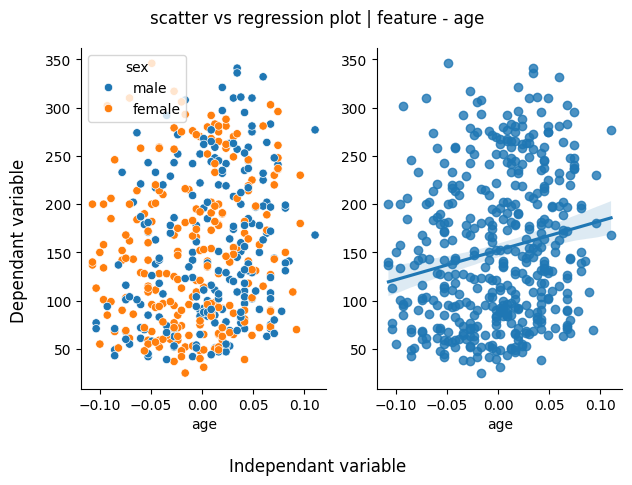

<Figure size 1600x1200 with 0 Axes>

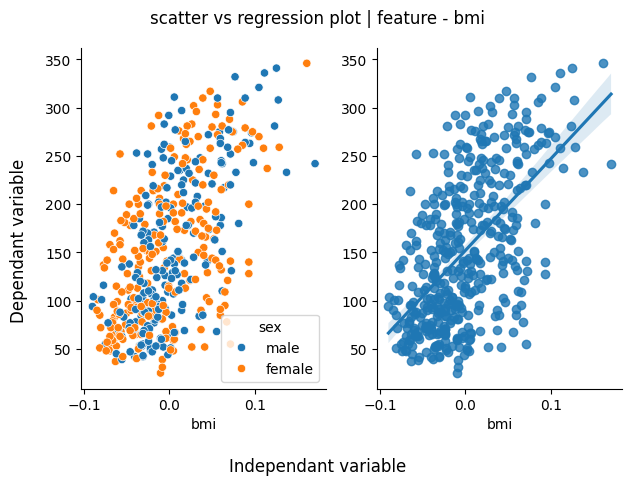

<Figure size 1600x1200 with 0 Axes>

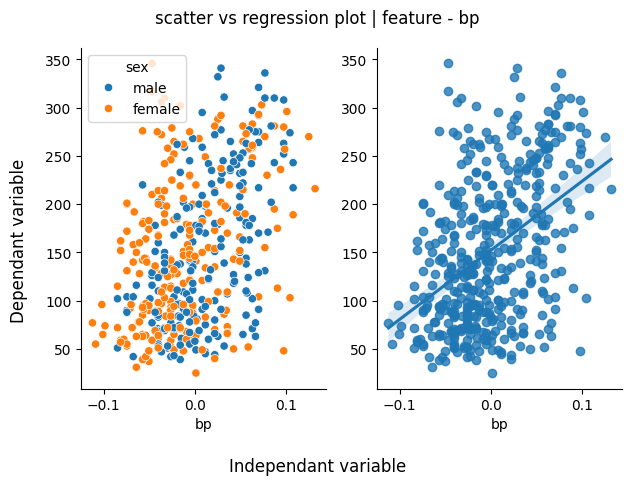

<Figure size 1600x1200 with 0 Axes>

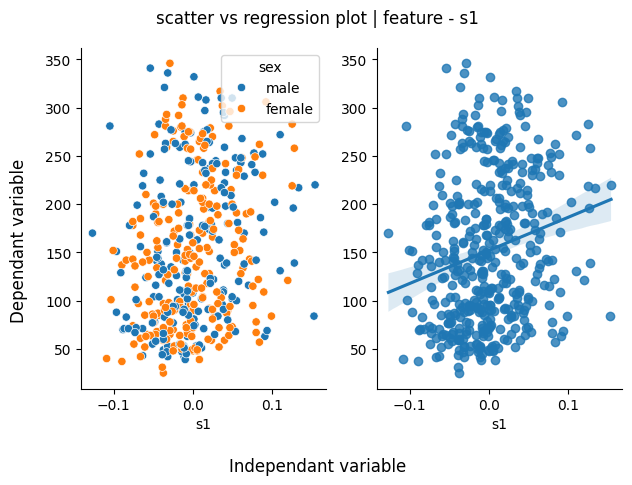

<Figure size 1600x1200 with 0 Axes>

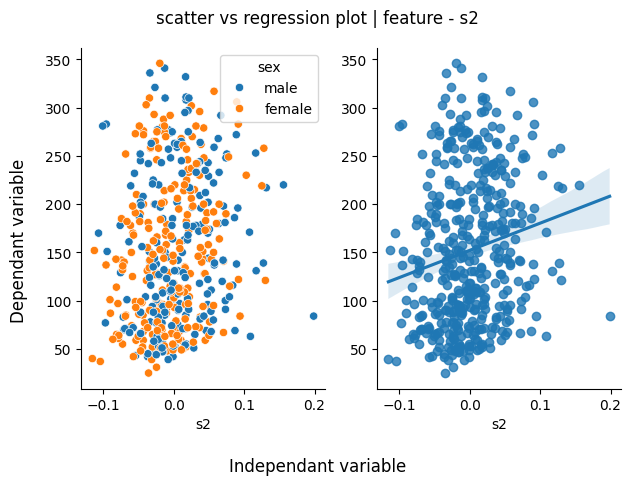

<Figure size 1600x1200 with 0 Axes>

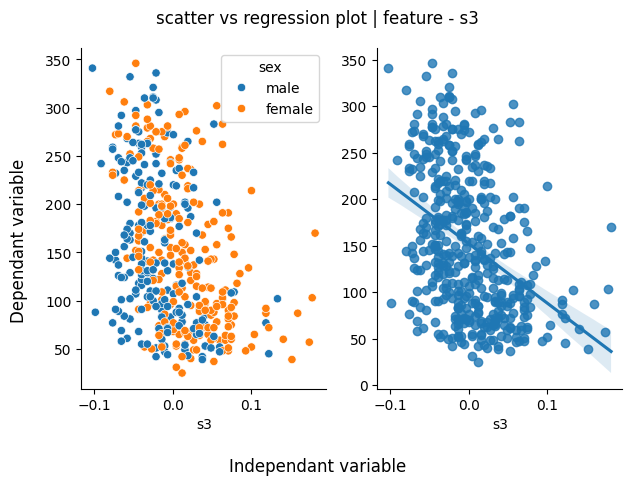

<Figure size 1600x1200 with 0 Axes>

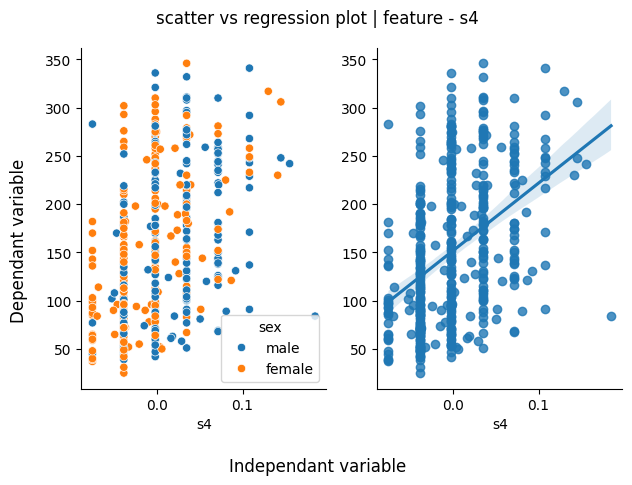

<Figure size 1600x1200 with 0 Axes>

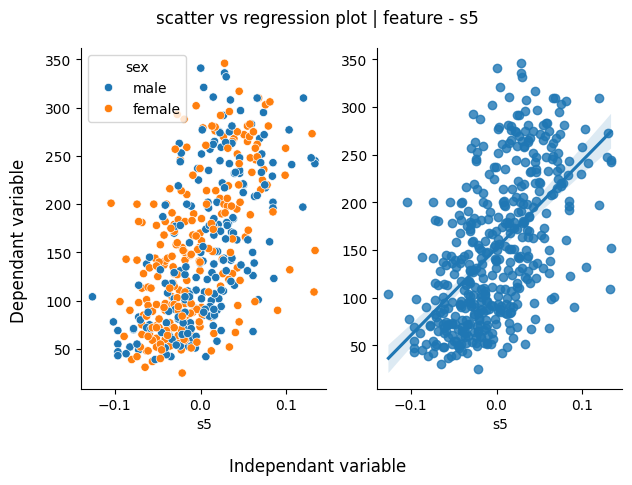

<Figure size 1600x1200 with 0 Axes>

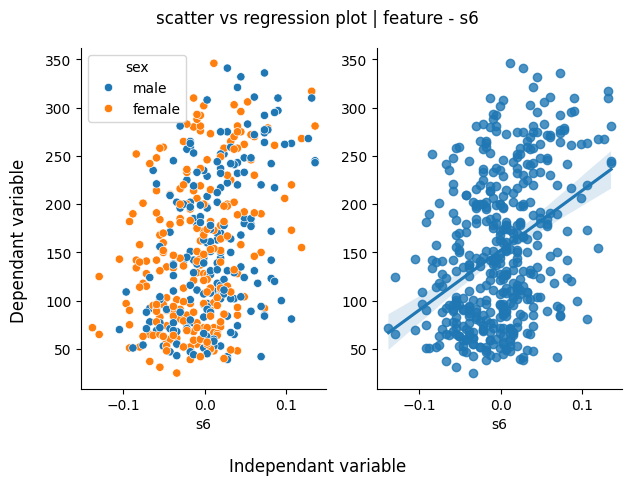

In [17]:
# Also i could do like this:

for col in df_complete.columns[:-1]:
    if col =='sex':
        continue
    plt.figure(figsize=(16,12))
    fig,ax = plt.subplots(nrows=1,ncols=2,squeeze=True,sharex=True)
    sns.scatterplot(ax=ax[0],x=df_complete[col],y=df_target,hue=df_sex_cat)
    sns.regplot(ax=ax[1],x=df_complete[col],y=df_target)
    fig.suptitle(f'scatter vs regression plot | feature - {col}')
    fig.supxlabel('Independant variable')
    fig.supylabel('Dependant variable')
    fig.tight_layout()
    sns.despine(fig,right=True)

### After inspecting these visuals, we can give some conclusion:  `my raw conclusions`


- bmi seems like a good predictor, relationship is linear mostly

- s6 seems fine

- s5 seems very good

- bp seems also fine

### __Coefficient of determination__, __MSE__

In [18]:
r2_dict = {}
df_complete.columns
selected_features = df_complete.iloc[:,[2,3,4,-3,-2]] #manually selected :C
selected_features
selected_features['target'] = df_target
selected_features


C:\Users\Admin\AppData\Local\Temp\ipykernel_13024\3031711470.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['target'] = df_target


bmi        bp        s1        s5        s6  target
0    0.061696  0.021872 -0.044223  0.019907 -0.017646   151.0
1   -0.051474 -0.026328 -0.008449 -0.068332 -0.092204    75.0
2    0.044451 -0.005670 -0.045599  0.002861 -0.025930   141.0
3   -0.011595 -0.036656  0.012191  0.022688 -0.009362   206.0
4   -0.036385  0.021872  0.003935 -0.031988 -0.046641   135.0
..        ...       ...       ...       ...       ...     ...
437  0.019662  0.059744 -0.005697  0.031193  0.007207   178.0
438 -0.015906 -0.067642  0.049341 -0.018114  0.044485   104.0
439 -0.015906  0.017293 -0.037344 -0.046883  0.015491   132.0
440  0.039062  0.001215  0.016318  0.044529 -0.025930   220.0
441 -0.073030 -0.081413  0.083740 -0.004222  0.003064    57.0

[442 rows x 6 columns]

### for every column (`feature`) I will take parameters to compute the `r2_score`

R^2 - coefficient of determination aka predictive power. How variance in X explains variance in Y

In [19]:
selected_features.drop(columns=['target'],inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13024\2484002052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.drop(columns=['target'],inplace=True)


In [20]:
from sklearn.metrics import mean_squared_error


In [21]:
def get_features(df):
    feature_storage = []
    for col in df.columns:
        feature_storage.append((col,df[col].to_numpy()))
    return feature_storage

x = get_features(selected_features)

In [22]:
y = df_target
def compute_r2(features,y):
    r2_container = []

    for _,X in features: # _ -> jer x iz gornje funkcije ima oblik ( 'name_col', array([])), tako da samo x reshape da bi imao 2dim za LR
        X = X.reshape(-1,1) # ukoliko je ndim=1 ne moze u model
        X_trainV1,X_testV1,y_trainV1,y_testV1 = train_test_split(
            X,y,random_state=42,train_size=0.8)
        regression_model = LinearRegression()
        regression_model.fit(X_trainV1,y_trainV1)
        y_predV1 = regression_model.predict(X_testV1)
        r2 = r2_score(y_testV1,y_predV1)        
        r2_container.append(r2) 

    return r2_container
result = compute_r2(x,y)
print(result)

[0.23335039815872138, 0.1734118396354255, 0.05556806691839933, 0.38269153958537394, 0.11003673084081]


In [23]:
dict_1 = dict(zip(result,selected_features.columns)) #coefficient of determination
dict_1


{0.23335039815872138: 'bmi',
 0.1734118396354255: 'bp',
 0.05556806691839933: 's1',
 0.38269153958537394: 's5',
 0.11003673084081: 's6'}

#### R^2 when comparing 1 feature with target THEN

### >R^2 = r^2 !!!

In [24]:
make_array = np.array([result])
r_score = np.sqrt(make_array)
print(f"Selected features coefficient of correlation: {r_score}")

Selected features coefficient of correlation: [[0.48306355 0.41642747 0.2357288  0.61862068 0.33171785]]


### `S5` is the best predictor of disease progression!

### Dropped s2 later but order is shuffled due to deletign/inserting new code
--- 

### **Multivariate model**

In [25]:
X = selected_features
y = df_target.reshape(-1,1)
# multivariate regression
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=49)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_hat = regressor.predict(X_test)
MSE = mean_squared_error(y_test,y_hat)
resid = y_test - y_hat
resid.reshape(-1).shape

(89,)

In [111]:
y_hat.shape
y_test.shape

(45,)

In [26]:
resid = resid.reshape(-1)

### Histplot of residuals
## Goal:

- check for the normality 

- check for patterns

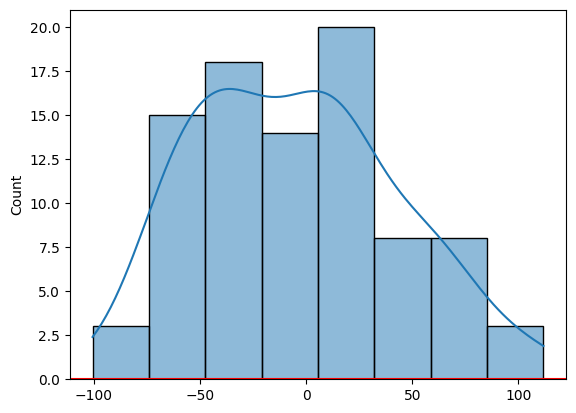

In [27]:
sns.histplot(x=resid,kde=True,cbar=True,cbar_ax=1)
plt.axhline(y=0,color='red')

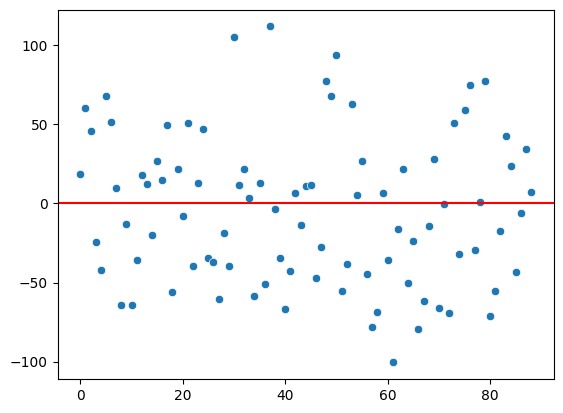

In [28]:
y_hat=y_hat.reshape(-1)
sns.scatterplot(resid)
plt.axhline(y=0,c='r')

### Variance inflation factor?

### Multicolinearity detection



VIF = 1/1-R2


In [29]:
vif = [variance_inflation_factor(selected_features,i) for i in range(selected_features.shape[1])]
vif
# less than 5 thats fine 
# > 10 , critical, variables must be adjusted in that case

[1.3857998453574176,
 1.331708231331277,
 1.3804389238726325,
 1.7687744763331315,
 1.4211848353105088]

In [57]:
### K-Fold cross_validation

# splits the data in k-folds 

r2_scorer = make_scorer(r2_score)
scores = cross_val_score(regressor,selected_features,df_target,cv=len(selected_features.columns))
scores

array([0.40092574, 0.4918345 , 0.49963599, 0.39304253, 0.53009876])

In [74]:
mean_r2 = np.mean(scores)
std_r2 = np.std(scores)
y_hat = y_hat.reshape(-1)
y_hat.shape
y_test = y_test.to_numpy().reshape(-1)


In [88]:
sns.scatterplot(x=y_test,y=y_hat)
sns.regplot(x=y_test, y=y_hat, ci=None, line_kws={'color':'green'})

plt.xlabel('Actual')
plt.ylabel('Predicted')
regressor.intercept_
regressor.feature_names_in_
regressor.coef_

ValueError: All arrays must be of the same length

In [90]:
regressor.coef_

array([[ 620.35973367,  207.74724915, -170.40594336,  639.12788385,
          38.27502461]])

### Ridge

In [ ]:
ridge_model = Ridge()
X_train,X_test,y_train,y_test = train_test_split(selected_features,df_target,train_size=0.9,random_state=119,shuffle=True)
ridge_model.fit(X_train,y_train)
ridge_model.coef_
ridge_model.intercept_
y_hat_ridge = ridge_model.predict(X_test)


<Axes: xlabel='Actual', ylabel='Predicted'>

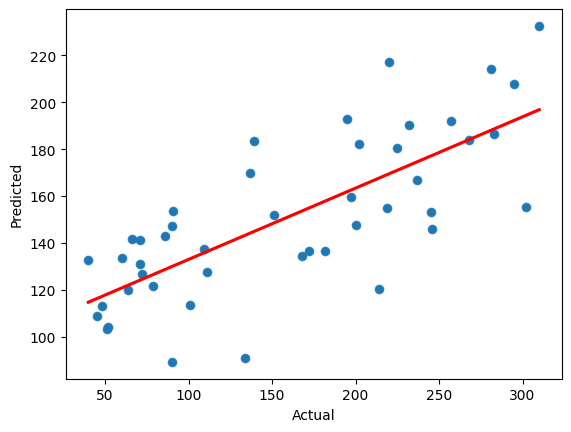

In [99]:
y_hat_ridge = y_hat_ridge.reshape(-1)
y_test = y_test.reshape(-1)
sns.scatterplot(x=y_test,y=y_hat_ridge)
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.regplot(x=y_test,y=y_hat_ridge,line_kws={'color':'red'},ci=1)

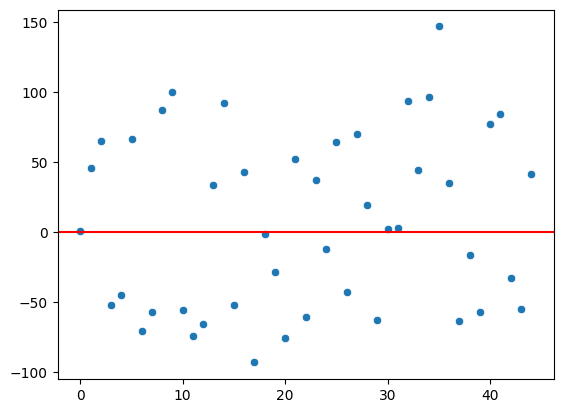

In [102]:
resid_ridge = y_test - y_hat_ridge
sns.scatterplot(resid_ridge)
plt.axhline(y=0,color='red')

In [106]:
print(regressor.coef_)
print(ridge_model.coef_)
r2_regressor = r2_score(y_test,y_pred)


[[ 620.35973367  207.74724915 -170.40594336  639.12788385   38.27502461]]
[312.86974337 200.42467014  -2.53282483 298.49659727 124.02104485]


ValueError: Found input variables with inconsistent numbers of samples: [45, 89]

# stigao sam ovde, residual variance!!!!!

---

In [31]:
# check for multicolinearity between s1-s6
df_blood_serum = df_complete.iloc[:,4:10]
df_blood_serum.corr()




s1        s2        s3        s4        s5        s6
s1  1.000000  0.896663  0.051519  0.542207  0.515503  0.325717
s2  0.896663  1.000000 -0.196455  0.659817  0.318357  0.290600
s3  0.051519 -0.196455  1.000000 -0.738493 -0.398577 -0.273697
s4  0.542207  0.659817 -0.738493  1.000000  0.617859  0.417212
s5  0.515503  0.318357 -0.398577  0.617859  1.000000  0.464669
s6  0.325717  0.290600 -0.273697  0.417212  0.464669  1.000000

<Axes: >

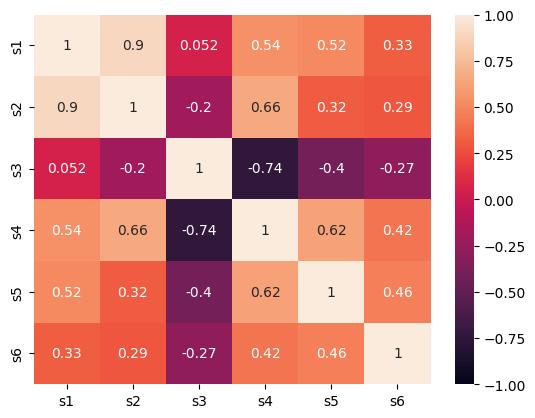

In [32]:
sns.heatmap(df_blood_serum.corr(),cmap='rocket',vmax=1,vmin=-1,annot=True)

## S2 and S1 corr = 0.9 WHich one to drop???
### Lets observe s2 and S1 relationship with target variable.

<Axes: >

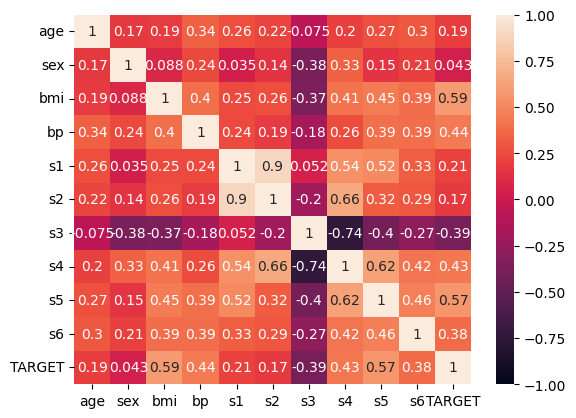

In [33]:
sns.heatmap(df_complete.corr(),cmap='rocket',vmin=-1,vmax=1,annot=True)

## S1 predicts the target better 0.21 > 0.17 
### dropping S2 from the dataset in regards to multicolinearity between s1-s2

In [34]:
df_complete.drop(columns={'s2'},inplace=True)


In [35]:
df_complete.head()

age       sex       bmi        bp        s1        s3        s4  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.043401 -0.002592   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449  0.074412 -0.039493   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.032356 -0.002592   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191 -0.036038  0.034309   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.008142 -0.002592   

         s5        s6  TARGET  
0  0.019907 -0.017646   151.0  
1 -0.068332 -0.092204    75.0  
2  0.002861 -0.025930   141.0  
3  0.022688 -0.009362   206.0  
4 -0.031988 -0.046641   135.0

<Axes: xlabel='sex', ylabel='bp'>

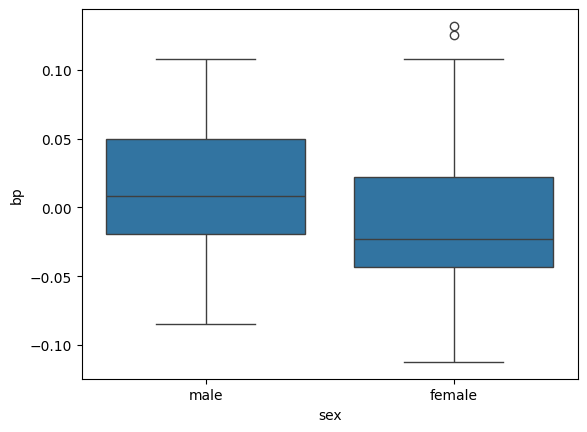

In [36]:
sns.boxplot(x=df_sex_cat,y=df_complete['bp'])
# bloodpressure is higher in males than females
# also body mass index


<Axes: xlabel='sex', ylabel='s1'>

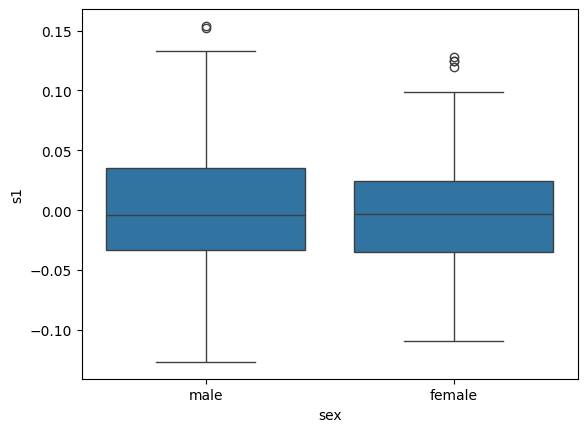

In [37]:
sns.boxplot(x=df_sex_cat,y=df_complete['s1'])
#Total cholesterol ration



<Axes: xlabel='sex', ylabel='s3'>

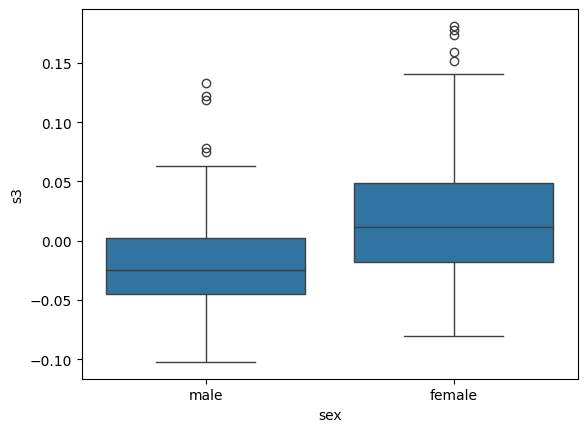

In [38]:
sns.boxplot(x=df_sex_cat,y=df_complete['s3'])
#good cholesterol


<Axes: xlabel='sex', ylabel='s4'>

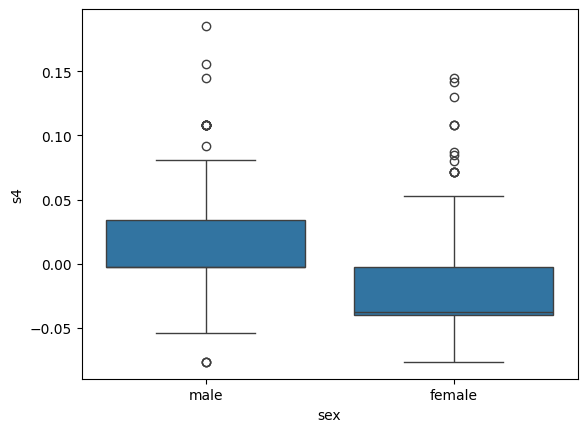

In [39]:
sns.boxplot(x=df_sex_cat,y=df_complete['s4'])
# expected for males, because of TCH/HDL, they have less HDL and more total TCH in their blood samples

<Axes: xlabel='sex', ylabel='s5'>

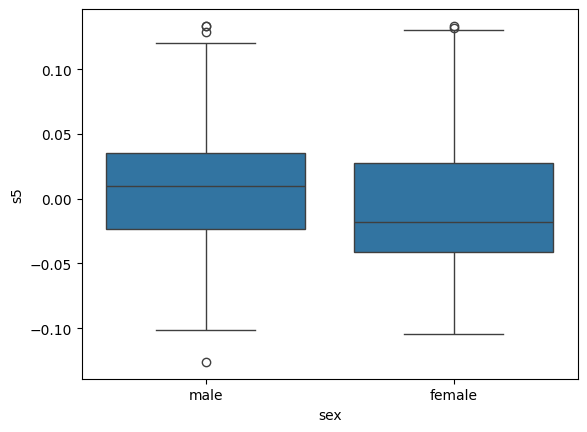

In [40]:
sns.boxplot(x=df_sex_cat,y=df_complete['s5'])
#log serum triglycerides



<Axes: xlabel='sex', ylabel='s6'>

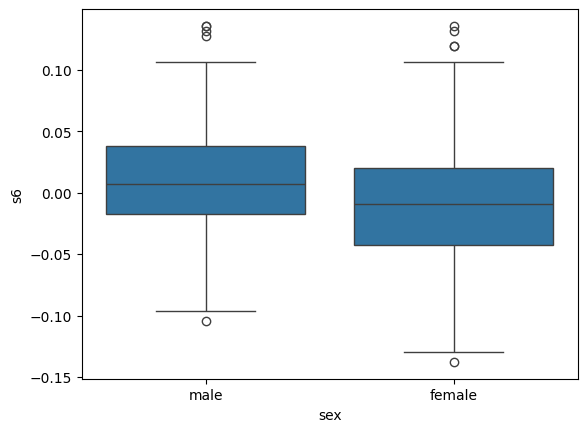

In [41]:
sns.boxplot(x=df_sex_cat,y=df_complete['s6'])


In [42]:
#Quantify the correlation

df_complete.corr()['TARGET'].sort_values()

s3       -0.394789
sex       0.043062
age       0.187889
s1        0.212022
s6        0.382483
s4        0.430453
bp        0.441482
s5        0.565883
bmi       0.586450
TARGET    1.000000
Name: TARGET, dtype: float64

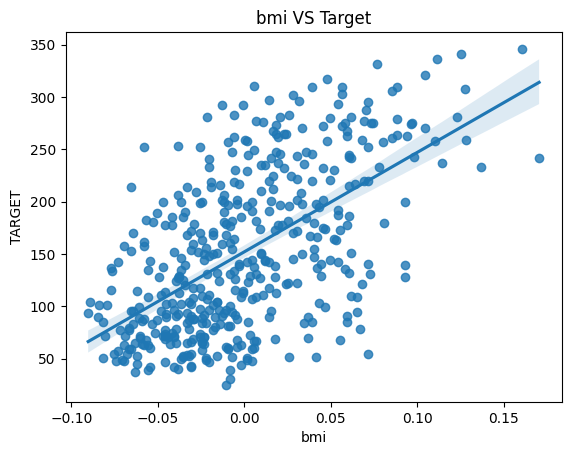

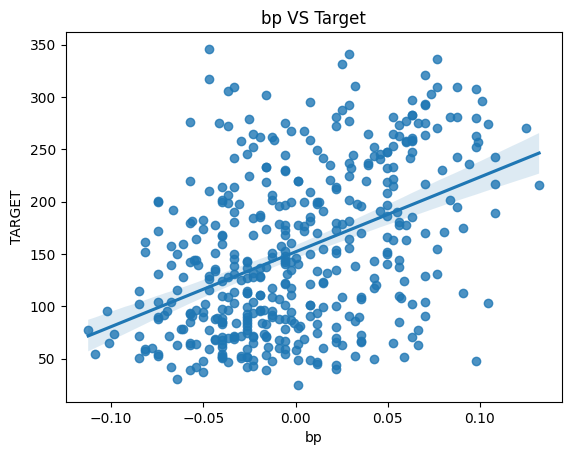

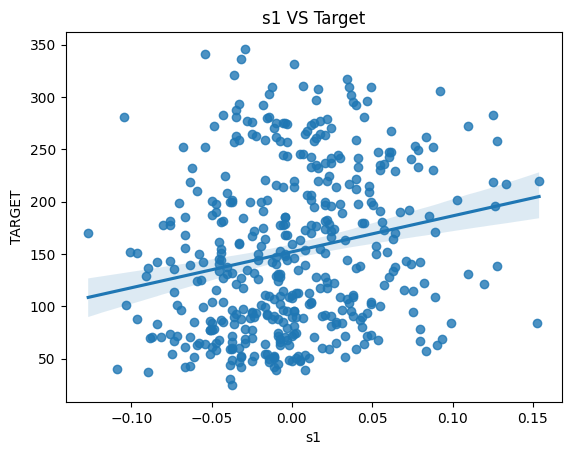

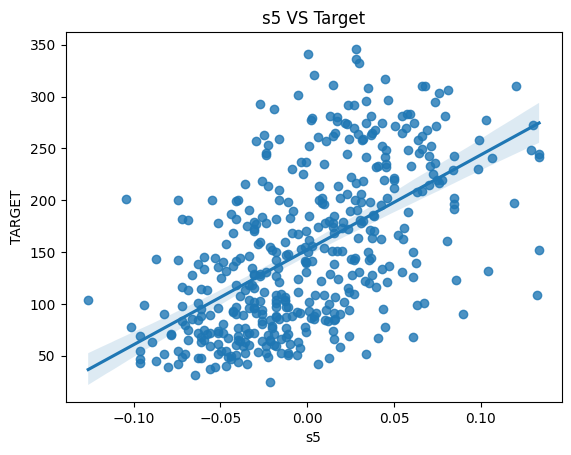

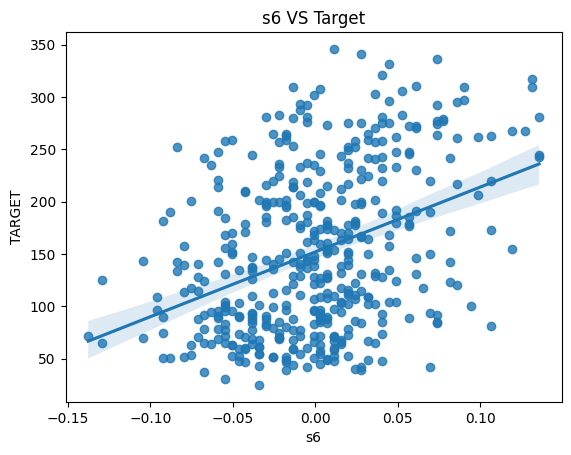

In [43]:
for col in selected_features.columns:
    sns.regplot(data=selected_features,y=df_complete['TARGET'],x=selected_features[col])
    plt.title(f"{col} VS Target")
    plt.show()

In [44]:
id = pd.Index([1, 3, 5, 7, 9])
iB = pd.Index([2, 3, 5, 7, 11])

id | iB

Index([3, 3, 5, 7, 11], dtype='int64')

In [45]:
z = pd.Series([1,2,3,4,10,100,1000],index=[10,20,30,40,60,90,100])
z[100]= 14
z
list(z.keys())
x = pd.Series({'country':['Serbia','Pakistan']})
y = pd.Series({'arbitage':(123,14)})
z = pd.DataFrame({'population':x,'number':y})
z

population     number
arbitage                 NaN  (123, 14)
country   [Serbia, Pakistan]        NaN

### regression model


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y.info

<bound method Series.info of arbitage    (123, 14)
dtype: object>

In [47]:
# testing for bmi
X = df_complete[['bmi']]
y = df_complete[['TARGET']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [48]:
print(f"Model r2 score is {r2_score(y_test,y_pred)}")
print(f"Model MSE is {mean_squared_error(y_test,y_pred)}")

Model r2 score is 0.21458029487444585
Model MSE is 4148.145437134556


### Baseline MSE

In [49]:
baseline_mse = np.mean((y_test - y_train.mean())**2)
baseline_mse

5281.975627943984

In [50]:
# manual LR
# slope = r * std_x/std_y
import math
x = np.array([40,50,60,70])
y = np.array([55,69,84,87])
mean_x = x.mean()
mean_y = y.mean()
np_std = np.std(x)
std_x1 = ((x[0] - mean_x))**2/4
std_x2 = ((x[1] - mean_x))**2/4
std_x3 = ((x[2] - mean_x))**2/4
std_x4 = ((x[3] - mean_x))**2/4
l2 = [std_x1,std_x2,std_x3,std_x4]
std_manual = math.sqrt(sum(l2))

std_manual,np_std
#slope 
#correlation = np.corrcoef() # ovo ovde! zapisi i nauci
# Pearson's coefficient of correlation says how well variance in the independant variable explains the variance in the target
# variable

(11.180339887498949, 11.180339887498949)